# Часть 1 Бустинг (5 баллов)

В этой части будем предсказывать зарплату data scientist-ов в зависимости  от ряда факторов с помощью градиентного бустинга.

В датасете есть следующие признаки:



* work_year: The number of years of work experience in the field of data science.

* experience_level: The level of experience, such as Junior, Senior, or Lead.

* employment_type: The type of employment, such as Full-time or Contract.

* job_title: The specific job title or role, such as Data Analyst or Data Scientist.

* salary: The salary amount for the given job.

* salary_currency: The currency in which the salary is denoted.

* salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

* employee_residence: The country or region where the employee resides.

* remote_ratio: The percentage of remote work offered in the job.

* company_location: The location of the company or organization.

* company_size: The company's size is categorized as Small, Medium, or Large.

In [ ]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw08_boosting_clustering/ds_salaries.csv

--2024-06-11 16:28:49--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw08_boosting_clustering/ds_salaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210076 (205K) [text/plain]
Saving to: ‘ds_salaries.csv’

ds_salaries.csv     100%[===================>] 205.15K  --.-KB/s    in 0.03s   

2024-06-11 16:28:50 (7.86 MB/s) - ‘ds_salaries.csv’ saved [210076/210076]



In [21]:
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Задание 1 (0.5 балла) Подготовка



*   Разделите выборку на train, val, test (80%, 10%, 10%)
*   Выдерите salary_in_usd в качестве таргета
*   Найдите и удалите признак, из-за которого возможен лик в данных


In [ ]:
from sklearn.model_selection import train_test_split

train, temp = train_test_split(df, test_size=0.2, random_state=0)
val, test = train_test_split(temp, test_size=0.5, random_state=0)

y_train = train['salary_in_usd']
y_val = val['salary_in_usd']
y_test = test['salary_in_usd']

train = train.drop(columns=['salary_in_usd'])
val = val.drop(columns=['salary_in_usd'])
test = test.drop(columns=['salary_in_usd'])


train = train.drop(columns=['salary'])
val = val.drop(columns=['salary'])
test = test.drop(columns=['salary'])

## Задание 2 (0.5 балла) Линейная модель


*   Закодируйте категориальные  признаки с помощью OneHotEncoder
*   Обучите модель линейной регрессии
*   Оцените  качество через MAPE и RMSE


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso

categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_encoded = ohe.fit_transform(train[categorical_features])
val_encoded = ohe.transform(val[categorical_features])

lasso = Lasso(alpha=0.0)
lasso.fit(train_encoded, y_train)

y_pred_lasso = lasso.predict(val_encoded)

mape_lasso = mean_absolute_percentage_error(y_val, y_pred_lasso)
rmse_lasso = mean_squared_error(y_val, y_pred_lasso, squared=False)

print('Lasso MAPE: ', mape_lasso)
print('Lasso RMSE: ', rmse_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-5-b3eb33e7afa4>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(train_encoded, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso MAPE:  0.4017706808328629
Lasso RMSE:  53175.49462413007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e+12, tolerance: 1.170e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


сделал с Lasso, так как с LinearRegression очень большая ошибка вылезла

## Задание 3 (0.5 балла) XGboost

Начнем с библиотеки xgboost.

Обучите модель `XGBRegressor` на тех же данных, что линейную модель, подобрав оптимальные гиперпараметры (`max_depth, learning_rate, n_estimators, gamma`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import make_scorer
import time

params = {
    'max_depth' : [3, 5, 7, 10],
    'learning_rate' : [0.01, 0.1, 0.2],
    'n_estimators' : [100, 200, 500],
    'gamma' : [0, 0.1, 0.2]
}

model = XGBRegressor()

def neg_mape(y_true, y_pred):
    return -mean_absolute_percentage_error(y_true, y_pred)

grid = GridSearchCV(model, params, cv=3, scoring=make_scorer(neg_mape, greater_is_better=False))

In [ ]:
start = time.time()
grid.fit(train_encoded, y_train)
end = time.time()
print(f"Training time: {end - start}")

start = time.time()
y_pred = grid.predict(val_encoded)
end = time.time()
print(f"Prediction time: {end - start}")

mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print('Best parameters: ', grid.best_params_)
print('MAPE: ', mape)
print('RMSE: ', rmse)

Training time: 179.11624097824097
Prediction time: 0.002537250518798828
Best parameters:  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
MAPE:  0.5091573995038546
RMSE:  53886.650463821454


## Задание 4 (1 балл) CatBoost

Теперь библиотека CatBoost.

Обучите модель `CatBoostRegressor`, подобрав оптимальные гиперпараметры (`depth, learning_rate, iterations`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

params = {
    'depth' : [3, 5, 7, 10],
    'learning_rate' : [0.01, 0.1, 0.2],
    'iterations' : [100, 200, 500]
}

model = CatBoostRegressor()

def neg_mape(y_true, y_pred):
    return -mean_absolute_percentage_error(y_true, y_pred)

grid = GridSearchCV(model, params, cv=3, scoring=make_scorer(neg_mape, greater_is_better=False))

In [10]:
start = time.time()
grid.fit(train_encoded, y_train)
end = time.time()
print("Training time:", end - start)

start = time.time()
y_pred = grid.predict(val_encoded)
end = time.time()
print("Prediction time:", end - start)

mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print('Best parameters: ', grid.best_params_)
print('MAPE: ', mape)
print('RMSE: ', rmse)

Выходные данные были обрезаны до нескольких последних строк (5000).
5:	learn: 50239.1982962	total: 25.6ms	remaining: 829ms
6:	learn: 49479.1059784	total: 32.1ms	remaining: 884ms
7:	learn: 49054.8873189	total: 38.6ms	remaining: 926ms
8:	learn: 48476.5815316	total: 45ms	remaining: 956ms
9:	learn: 48009.9227863	total: 53.9ms	remaining: 1.02s
10:	learn: 47493.2224672	total: 60.7ms	remaining: 1.04s
11:	learn: 47238.0016480	total: 67ms	remaining: 1.05s
12:	learn: 46993.5408850	total: 73.3ms	remaining: 1.05s
13:	learn: 46864.4747574	total: 76ms	remaining: 1.01s
14:	learn: 46825.5043388	total: 78ms	remaining: 962ms
15:	learn: 46709.1956184	total: 81.9ms	remaining: 942ms
16:	learn: 46485.6644739	total: 88.5ms	remaining: 952ms
17:	learn: 46402.3168782	total: 95ms	remaining: 960ms
18:	learn: 46317.4306943	total: 98.8ms	remaining: 942ms
19:	learn: 46232.6127167	total: 106ms	remaining: 953ms
20:	learn: 46050.5010358	total: 112ms	remaining: 957ms
21:	learn: 45979.8864364	total: 120ms	remaining: 970m

Для применения catboost моделей не обязательно сначала кодировать категориальные признаки, модель может кодировать их сама. Обучите catboost с подбором оптимальных гиперпараметров снова, используя pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметра cat_features. Оцените качество и время. Стало ли лучше?

In [11]:
from catboost import Pool

cat_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                'employee_residence', 'company_location', 'company_size']

X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)

params = {
    'depth' : [3, 5, 7, 10],
    'learning_rate' : [0.01, 0.1, 0.2],
    'iterations' : [100, 200, 500]
}

model = CatBoostRegressor()

grid = model.grid_search(params, train_pool, cv=3, plot=False)

start = time.time()
model = CatBoostRegressor(**grid['params'])
model.fit(train_pool)
end = time.time()
print("Training time:", end - start)

start = time.time()
y_pred = model.predict(val_pool)
end = time.time()
print("Prediction time:", end - start)

mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print('Best parameters: ', grid['params'])
print('MAPE: ', mape)
print('RMSE: ', rmse)

Выходные данные были обрезаны до нескольких последних строк (5000).
476:	learn: 1691.5992559	test: 8115.4457966	best: 8104.0997210 (423)	total: 5.03s	remaining: 243ms
477:	learn: 1689.3677308	test: 8116.0747258	best: 8104.0997210 (423)	total: 5.04s	remaining: 232ms
478:	learn: 1684.2900599	test: 8117.6024261	best: 8104.0997210 (423)	total: 5.05s	remaining: 221ms
479:	learn: 1681.1997710	test: 8117.4101930	best: 8104.0997210 (423)	total: 5.06s	remaining: 211ms
480:	learn: 1676.3093291	test: 8117.2885095	best: 8104.0997210 (423)	total: 5.07s	remaining: 200ms
481:	learn: 1672.8899491	test: 8111.6893163	best: 8104.0997210 (423)	total: 5.08s	remaining: 190ms
482:	learn: 1670.6203766	test: 8115.5833577	best: 8104.0997210 (423)	total: 5.09s	remaining: 179ms
483:	learn: 1668.0620308	test: 8117.1079120	best: 8104.0997210 (423)	total: 5.09s	remaining: 168ms
484:	learn: 1664.8864678	test: 8120.5612642	best: 8104.0997210 (423)	total: 5.1s	remaining: 158ms
485:	learn: 1663.3282522	test: 8120.110895

**Ответ:** # стало мега-круто

## Задание 5 (0.5 балла) LightGBM

И наконец библиотека LightGBM - используйте `LGBMRegressor`, снова подберите гиперпараметры, оцените качество и скорость.


In [12]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

params = {
    'max_depth' : [3, 5, 7, 10],
    'learning_rate' : [0.01, 0.1, 0.2],
    'n_estimators' : [100, 200, 500]
}
le = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le.fit(X_train[col])
        X_train[col] = le.transform(X_train[col])
        X_val[col] = X_val[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

model = LGBMRegressor()

def neg_mape(y_true, y_pred):
    return -mean_absolute_percentage_error(y_true, y_pred)

grid = GridSearchCV(model, params, cv=3, scoring=make_scorer(neg_mape, greater_is_better=False), error_score='raise')
start = time.time()
grid.fit(X_train, y_train)
end = time.time()
print("Training time:", end - start)

start = time.time()
y_pred = grid.predict(X_val)
end = time.time()
print("Prediction time:", end - start)

mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print('Best parameters: ', grid.best_params_)
print('MAPE: ', mape)
print('RMSE: ', rmse)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

## Задание 6 (2 балла) Сравнение и выводы

Сравните модели бустинга и сделайте про них выводы, какая из моделей показала лучший/худший результат по качеству, скорости обучения и скорости предсказания? Как отличаются гиперпараметры для разных моделей?

**Ответ:** # Самыми долгими и приблизительно равными по качеству моделями стали catboost, xgboost. Чуть лучше по качеству сработала обычная линейная модель. Еще лучше по качеству и быстрее сработала библиотека LightGBM. А самой быстрой и отличной по качеству стала catboost с использованием pool, для которой лучшими параметрами оказались depth = 5(больше чем у других) и наибольшее количество итераций по сравнению с другими моделями

# Часть 2 Кластеризация (5 баллов)

Будем работать с данными о том, каких исполнителей слушают пользователи музыкального сервиса.

Каждая строка таблицы - информация об одном пользователе. Каждый столбец - это исполнитель (The Beatles, Radiohead, etc.)

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля прослушивания этого исполнителя этим пользователем.


In [13]:
import pandas as pd
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Будем строить кластеризацию исполнителей: если двух исполнителей слушало много людей примерно одинаковую долю своего времени (то есть векторы близки в пространстве), то, возможно исполнители похожи. Эта информация может быть полезна при построении рекомендательных систем.

## Задание 1 (0.5 балла) Подготовка

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [15]:
ratings = ratings.transpose()

Выкиньте строку под названием `user`.

In [16]:
ratings = ratings.drop('user')

In [17]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице много пропусков, так как пользователи слушают не всех-всех исполнителей, чья музыка представлена в сервисе, а некоторое подмножество (обычно около 30 исполнителей)


Доля исполнителя в музыке, прослушанной  пользователем, равна 0, если пользователь никогда не слушал музыку данного музыканта, поэтому заполните пропуски нулями.



In [18]:
ratings = ratings.fillna(0)
ratings.sample()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
descendents,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Задание 2 (0.5 балла) Первая кластеризация

Примените KMeans с 5ю кластерами, сохраните полученные лейблы

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(ratings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Выведите размеры кластеров. Полезной ли получилась кластеризация? Почему KMeans может выдать такой результат?

In [22]:
cluster_sizes = np.bincount(labels)
print(cluster_sizes)

[  1   3  77   1 918]


**Ответ:** # -- YOUR ANSWER HERE --

## Задание 3 (0.5 балла) Объяснение результатов

При кластеризации получилось $\geq 1$ кластера размера 1. Выведите исполнителей, которые составляют такие кластеры. Среди них должна быть группа The Beatles.

In [23]:
singleton_labels = np.where(np.bincount(labels) == 1)[0]
singleton_artists = ratings.index[np.isin(labels, singleton_labels)]

print(singleton_artists)

Index(['the beatles', 'radiohead'], dtype='object')


Изучите данные, почему именно The Beatles выделяется?

Подсказка: посмотрите на долю пользователей, которые слушают каждого исполнителя, среднюю долю прослушивания.

**Для этого посмотрим на долю пользователей, которые слушают битлз и среднюю долю прослушивания**

In [28]:
average_listen_share = ratings.mean(axis=1)
listener_count = (ratings > 0).sum(axis=1)

print('Average listen share for agalloch:', average_listen_share['agalloch'])
print('Listener count for agalloch:', listener_count['agalloch'])

Average listen share for The Beatles: 0.000997435733906328
Listener count for The Beatles: 47


In [29]:
print('Average listen share for The Beatles:', average_listen_share['the beatles'])
print('Listener count for The Beatles:', listener_count['the beatles'])

Average listen share for The Beatles: 0.01836897659205146
Listener count for The Beatles: 1671


**Ответ:** # разница видна

## Задание 4 (0.5 балла) Улучшение кластеризации

Попытаемся избавиться от этой проблемы: нормализуйте данные при помощи `normalize`.

In [30]:
from sklearn.preprocessing import normalize

ratings_normalized = normalize(ratings)
ratings_normalized = pd.DataFrame(ratings_normalized, index=ratings.index, columns=ratings.columns)

Примените KMeans с 5ю кластерами на преобразованной матрице, посмотрите на их размеры. Стало ли лучше? Может ли кластеризация быть полезной теперь?

In [31]:
labels_normalized = kmeans.fit_predict(ratings_normalized)
cluster_sizes_normalized = np.bincount(labels_normalized)

print(cluster_sizes_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 72 476 285  96  71]


**Ответ** # теперь стало получше

## Задание 5 (1 балл) Центроиды

Выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду по косинусной мере. Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [32]:
from sklearn.metrics.pairwise import cosine_distances

distances = cosine_distances(ratings_normalized, kmeans.cluster_centers_)

distances_df = pd.DataFrame(distances, index=ratings_normalized.index, columns=range(5))
distances_df['cluster'] = labels_normalized

for cluster in range(5):
    print("Cluster ", cluster, ": ", sep="")
    print(distances_df[distances_df['cluster'] == cluster].iloc[:, cluster].nsmallest(10))
    print("\n")

Cluster 0: 
nas                             0.493029
a tribe called quest            0.523242
the roots featuring d'angelo    0.553710
gangstarr                       0.585666
jay-z                           0.593991
de la soul                      0.598022
murs and 9th wonder             0.609812
mos def                         0.609911
little brother                  0.614634
talib kweli                     0.627214
Name: 0, dtype: float64


Cluster 1: 
metallica                0.740627
red hot clili peppers    0.744757
led zeppelin.            0.746929
system of a down         0.747749
coldplay                 0.753560
pink fluid               0.755745
foo fighters             0.757280
niИ                      0.761161
tool                     0.761982
acdc                     0.762927
Name: 1, dtype: float64


Cluster 2: 
radiohead              0.593643
the arcade fire        0.619898
sufjan stevens         0.631643
belle and sebastian    0.631768
broken social scene    0.644088
an

**Ответ:** # кластеры могут отображать стили музыки исполнителей, принадлежащих этому кластеру.

## Задание 6 (1 балл) Визуализация

Хотелось бы как-то визуализировать полученную кластеризацию. Постройте точечные графики `plt.scatter` для нескольких пар признаков исполнителей, покрасив точки в цвета кластеров. Почему визуализации получились такими? Хорошо ли они отражают разделение на кластеры? Почему?

In [36]:
print(ratings_normalized.columns)

RangeIndex(start=0, stop=5000, step=1)


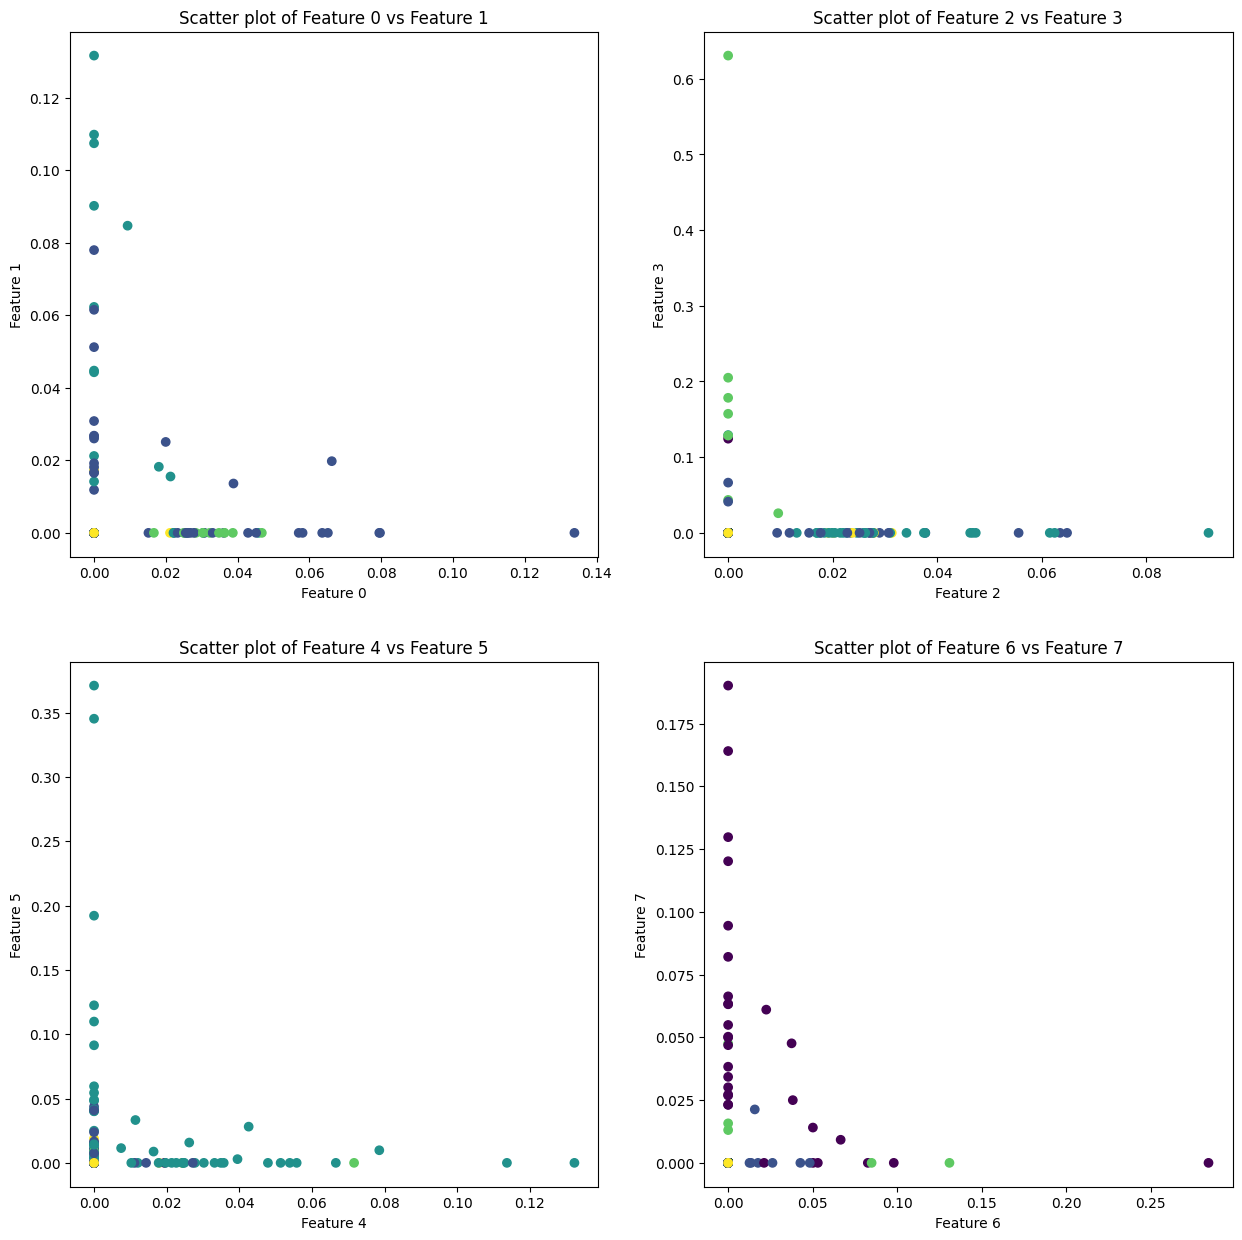

In [39]:
import matplotlib.pyplot as plt

feature_pairs = [(0, 1), (2, 3), (4, 5), (6, 7)]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for ax, pair in zip(axs.flatten(), feature_pairs):
    scatter = ax.scatter(ratings_normalized.iloc[:, pair[0]], ratings_normalized.iloc[:, pair[1]], c=labels_normalized, cmap='viridis')
    ax.set_xlabel(f'Feature {pair[0]}')
    ax.set_ylabel(f'Feature {pair[1]}')
    ax.set_title(f'Scatter plot of Feature {pair[0]} vs Feature {pair[1]}')

plt.show()

**Ответ:** # Визуализации не отражают полностью разделение на кластеры, потому что они показывают только два признака за раз, в то время как KMeans работает в многомерном пространстве.

Для визуализации данных высокой размерности существует метод t-SNE (стохастическое вложение соседей с t-распределением). Данный метод является нелинейным методом снижения размерности: каждый объект высокой размерности будет моделироваться объектов более низкой (например, 2) размерности таким образом, чтобы похожие объекты моделировались близкими, непохожие - далекими с большой вероятностью.

Примените `TSNE` из библиотеки `sklearn` и визуализируйте полученные объекты, покрасив их в цвета их кластеров

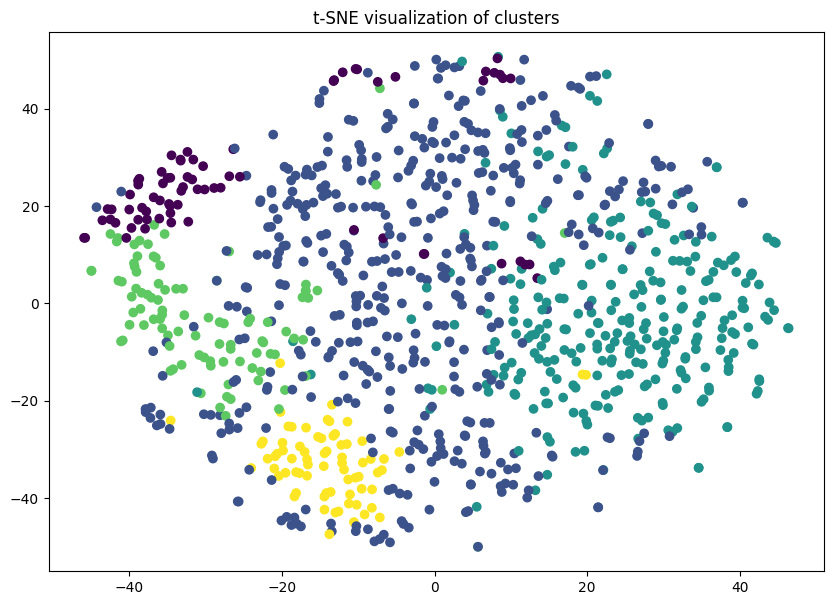

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
ratings_tsne = tsne.fit_transform(ratings_normalized)

plt.figure(figsize=(10, 7))
plt.scatter(ratings_tsne[:, 0], ratings_tsne[:, 1], c=labels_normalized, cmap='viridis')
plt.title('t-SNE visualization of clusters')
plt.show()

## Задание 7 (1 балл) Подбор гиперпараметров

Подберите оптимальное количество кластеров (максимум 100 кластеров) с использованием индекса Силуэта. Зафиксируйте `random_state=42`

In [41]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 101):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ratings_normalized)
    cluster_labels = kmeans.predict(ratings_normalized)

    silhouette_avg = silhouette_score(ratings_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("The optimal number of clusters is", optimal_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal number of clusters is 95


Выведите исполнителей, ближайших с центроидам (аналогично заданию 5). Как соотносятся результаты? Остался ли смысл кластеров прежним? Расскажите про смысл 1-2 интересных кластеров, если он изменился и кластеров слишком много, чтобы рассказать про все.

In [47]:
distances = cosine_distances(ratings_normalized, kmeans.cluster_centers_)
for i in range(kmeans.n_clusters):
    top10 = np.argsort(distances[:, i])[:10]
    print(f"Cluster {i}:")
    for j in top10:
        print(ratings_normalized.index[j])
    print("\n")

Cluster 0:
circa survive
portugal. the man
cursive
citya and colour
the blood brothers
coheed and cambria
four year strong
owen
why?
manchester orchestra


Cluster 1:
the brian jonestown massacre
spiritualized®
black rebel motorcycle club
the dandy warhols
the verve
silver jews
pavement
the jesus and mary chain
velvet underground
sonic youth


Cluster 2:
squarepusher.
autechre
amon tobin
boards of canada
aphex twin
prefuse 73
underworld
rjd2
burial
björk guğmunsdóttir


Cluster 3:
talib kweli
the roots featuring d'angelo
mos def
little brother
common
jurassic 5
cunninlynguists
lupe the gorilla
nas
a tribe called quest


Cluster 4:
mgmt
vampire weekend
tokyo police club
ratatat
kings of leon
the klaxons
justice
los campesinos!
the dodos
au rivoir simone


Cluster 5:
my bloody valentine
deerhunter
animal collective
slowdive
beach house
asobi seksu
liars
broadcast
pavement
the jesus and mary chain


Cluster 6:
destinys child
janet jackson.
rihanna & jay-z
mariah carey
mary j. blige
the pu

**Ответ:** # 59 кластер - самый интересный. Венские классики + выдающиеся композторы и кореец. Хочется сказать, что смысл кластеров - снова стиль музыки исполнителей.

Сделайте t-SNE визуализацию полученной кластеризации.

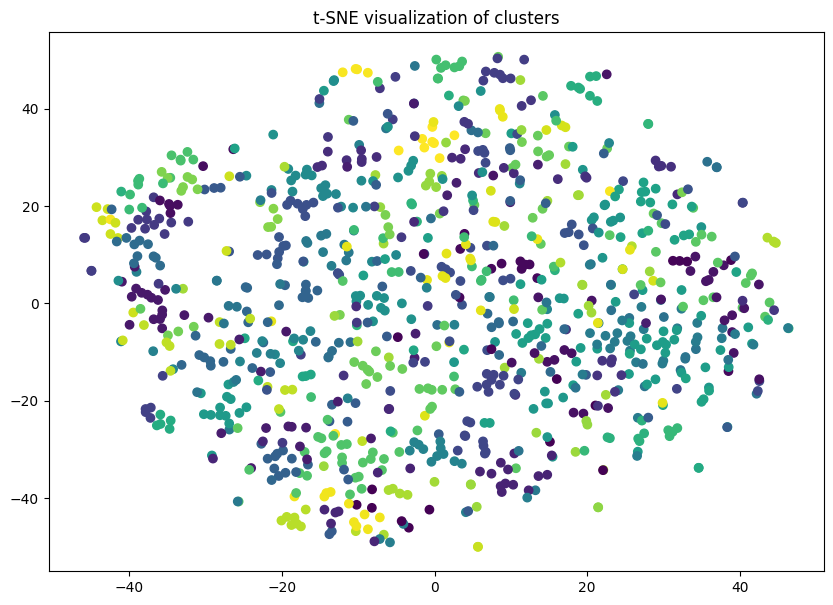

In [48]:
tsne = TSNE(n_components=2, random_state=42)
ratings_tsne = tsne.fit_transform(ratings_normalized)
cluster_labels = kmeans.predict(ratings_normalized)

plt.figure(figsize=(10, 7))
plt.scatter(ratings_tsne[:, 0], ratings_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE visualization of clusters')
plt.show()

Если кластеров получилось слишком много и визуально цвета плохо отличаются, покрасьте только какой-нибудь интересный кластер из задания выше (`c = (labels == i)`). Хорошо ли этот кластер отражается в визуализации?

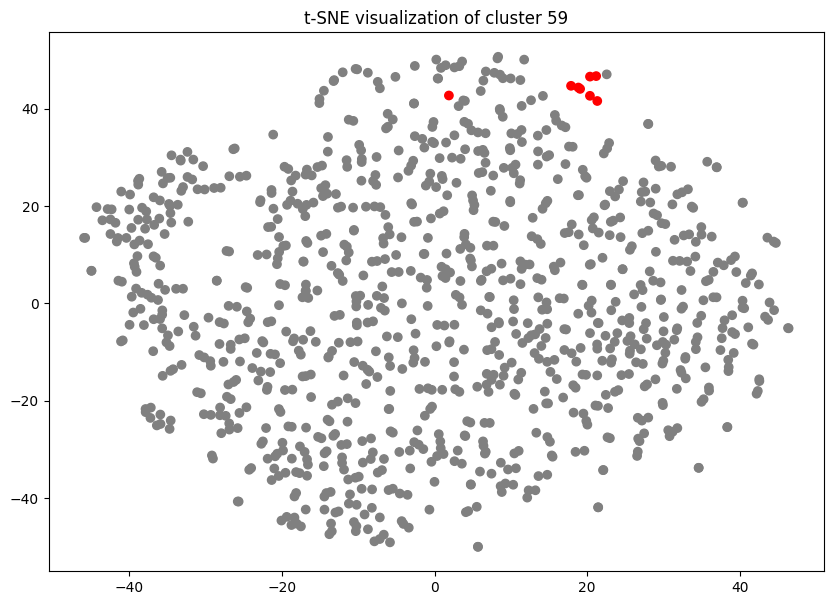

In [51]:
interesting_cluster = 59

colors = np.where(cluster_labels == interesting_cluster, 'red', 'gray')

plt.figure(figsize=(10, 7))
plt.scatter(ratings_tsne[:, 0], ratings_tsne[:, 1], c=colors)
plt.title(f't-SNE visualization of cluster {interesting_cluster}')
plt.show()

**Ответ:** # отражается вообще отлично